In [1]:
import tike.ptycho
import numpy as np
import matplotlib.pyplot as plt
import importlib

In [2]:
for module in [tike, np]:
    print("{} is version {}".format(module.__name__, module.__version__))

tike is version 0.6.2.dev27+ge8455f0
numpy is version 1.15.4


# Create test data

Make a test data for pytchography reconstruction at one projection angle.

### Define the object

Normalize input uint8 images to the `[0, 1]` and `[0, pi]` ranges.

In [3]:
amplitude = plt.imread("../tests/data/Cryptomeria_japonica-0128.tif") / 255
phase = plt.imread("../tests/data/Bombus_terrestris-0128.tif") / 255 * np.pi
np.min(phase), np.max(phase)

(0.036959913571644624, 3.129272682399245)

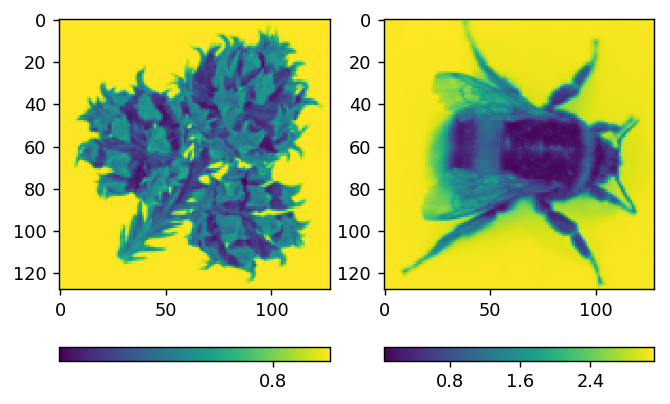

(128, 128)

(-0.9999241101148306+0.012319659535238529j) (0.9951469164070644+0.0984002782796427j)


In [4]:
original = amplitude * np.exp(1j * phase)
tike.plot_phase(original)
original.shape

### Define the probe

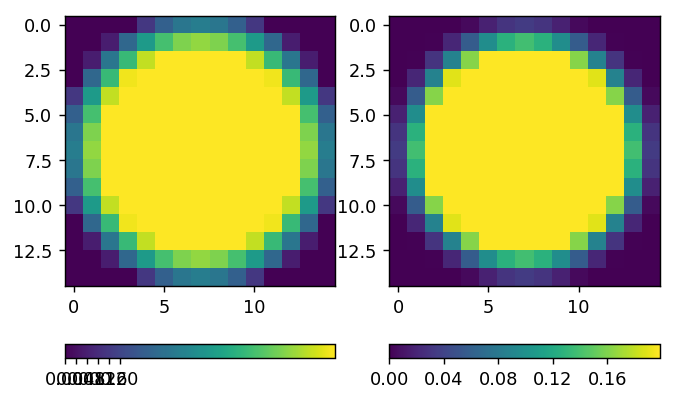

In [5]:
pw = 15 # probe width
weights = tike.ptycho.gaussian(pw, rin=0.8, rout=1.0)
probe = weights * np.exp(1j * weights * 0.2)
tike.plot_complex(probe)

### Define the trajectory

In [6]:
v, h = np.meshgrid(
    np.linspace(0, amplitude.shape[0]-pw, 24, endpoint=False),
    np.linspace(0, amplitude.shape[0]-pw, 24, endpoint=False),
    indexing='ij'
    )
print(v.shape, h.size)

(24, 24) 576


## Simulate data acquisition

In [7]:
# Then what we see at the detector is the wave propagation
# of the near field wavefront
data = tike.ptycho.simulate(data_shape=np.ones(2, dtype=int)*pw*3,
                            probe=probe, v=v, h=h,
                            psi=original)
data = np.random.poisson(data)
data.shape

(576, 45, 45)

/home/beams/DCHING/miniconda3/envs/tike/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


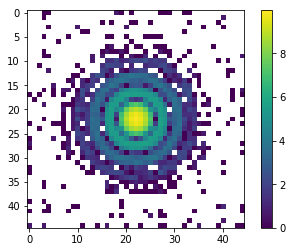

(0, 21633)

In [8]:
plt.imshow(np.fft.fftshift(np.log(data[11])))
plt.colorbar()
plt.show()
np.min(data), np.max(data)

# Reconstruct

Now we need to try and reconstruct psi.

In [9]:
# Start with a guess of all zeros for psi
new_psi = np.ones(original.shape, dtype=complex)

INFO:tike.ptycho:grad on 576 - 45 by 45 grids for 1 iterations


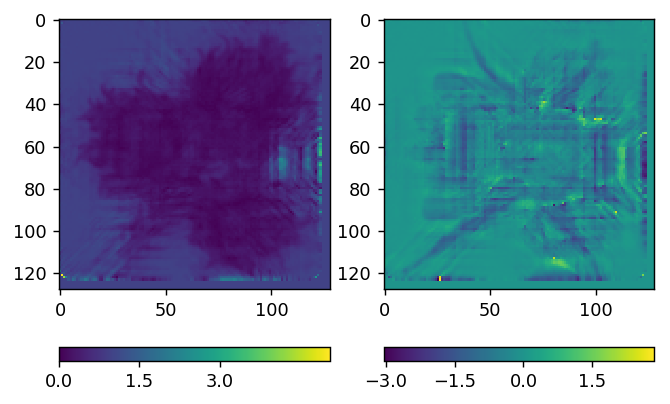

INFO:tike.ptycho:grad on 576 - 45 by 45 grids for 1 iterations


(-3.0633564-1.4613662j) (4.6652145-1.9279608j)


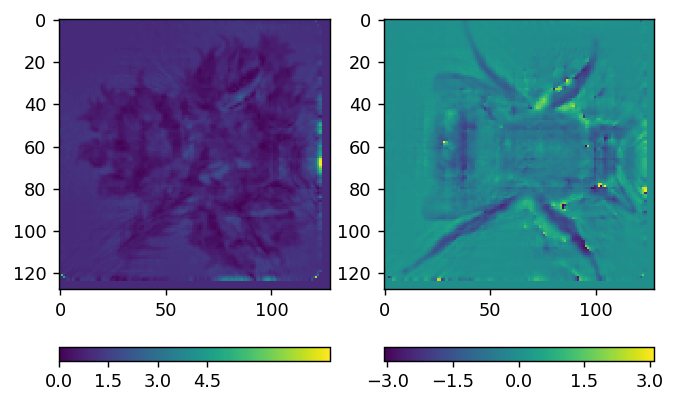

INFO:tike.ptycho:grad on 576 - 45 by 45 grids for 1 iterations


(-2.4916477-3.9639573j) (5.7852015-0.61485136j)


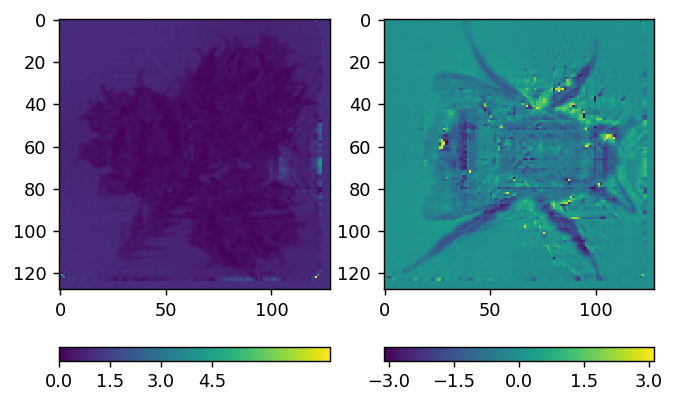

INFO:tike.ptycho:grad on 576 - 45 by 45 grids for 1 iterations


(-2.705679-2.6079013j) (4.419364-0.7334712j)


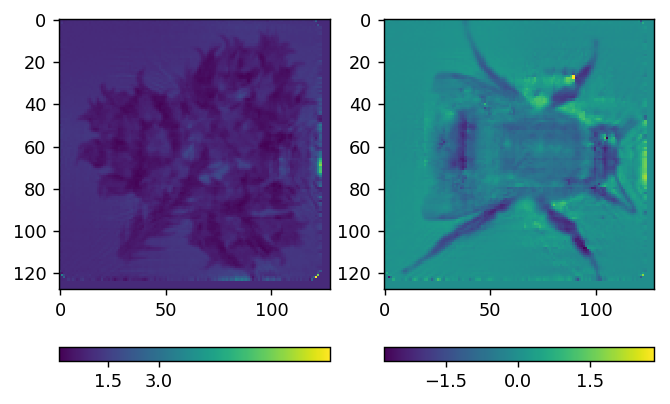

INFO:tike.ptycho:grad on 576 - 45 by 45 grids for 1 iterations


(-2.0187788+6.194535j) (3.6202536-0.08975327j)


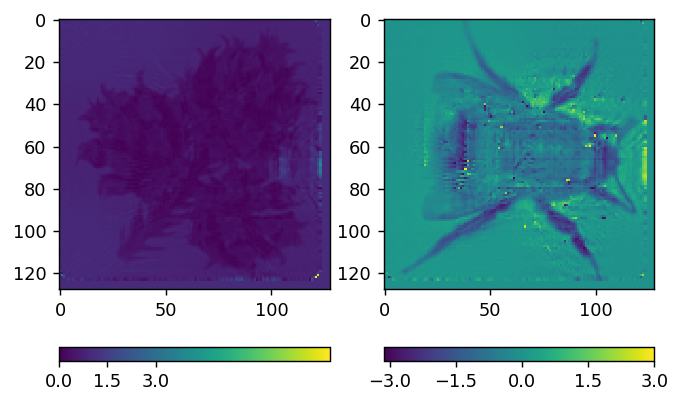

INFO:tike.ptycho:grad on 576 - 45 by 45 grids for 1 iterations


(-3.3730597+7.151223j) (3.253615+0.17376652j)


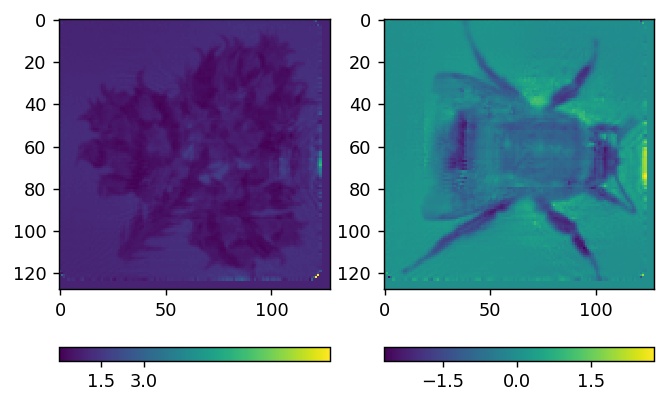

INFO:tike.ptycho:grad on 576 - 45 by 45 grids for 1 iterations


(-3.2684634+8.852232j) (3.234031+0.45176563j)


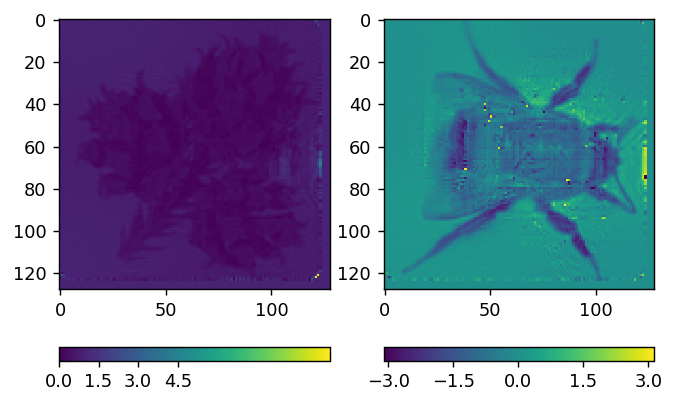

INFO:tike.ptycho:grad on 576 - 45 by 45 grids for 1 iterations


(-4.2361465+9.3304825j) (3.235573+0.49411422j)


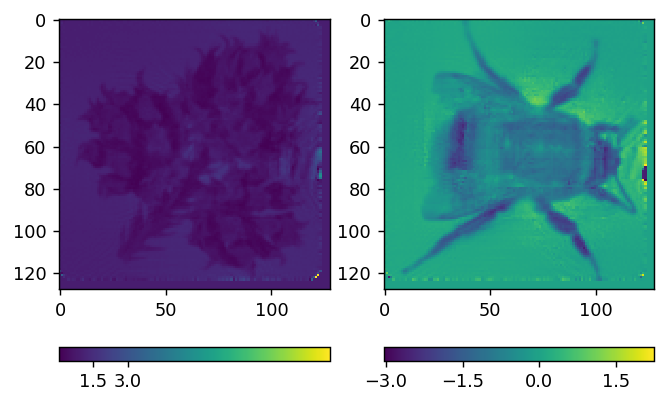

INFO:tike.ptycho:grad on 576 - 45 by 45 grids for 1 iterations


(-5.095598-3.027089j) (3.634453+0.10321436j)


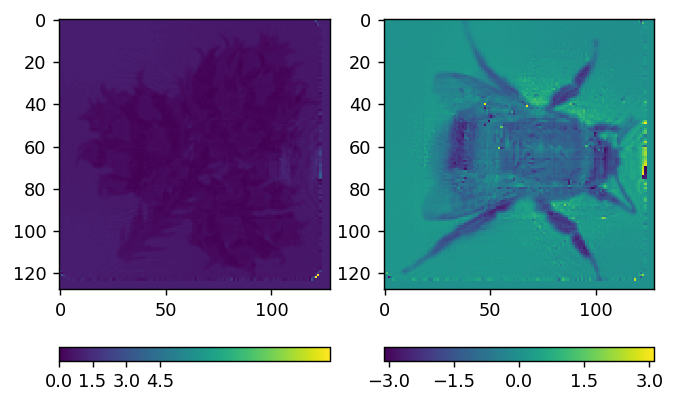

INFO:tike.ptycho:grad on 576 - 45 by 45 grids for 1 iterations


(-5.021015+10.913992j) (3.4737337+0.6010862j)


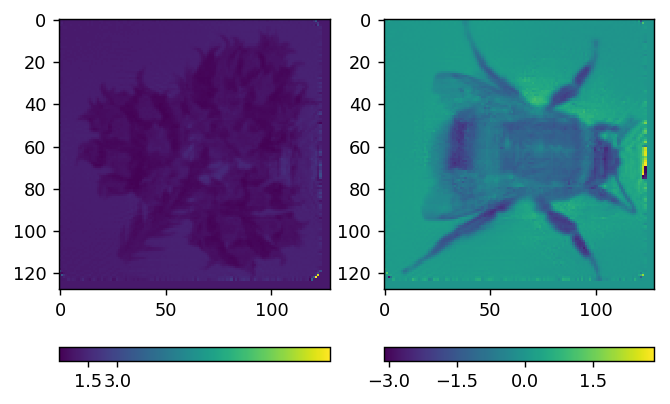

(-4.8667355+11.864441j) (4.329092+0.34020805j)


In [10]:
for i in range(10):
    new_psi = tike.ptycho.reconstruct(data=data,
                                      probe=probe, v=v, h=h,
                                      psi=new_psi,
                                      algorithm='grad',
                                      num_iter=1, gamma=1)
    tike.plot_phase(new_psi)